# **Prerequisites: Data Download and Setup**

This tutorial demonstrates two methods of obtaining and loading the LiveJournal social network dataset. We will cover:

1. **Automated Download and Extraction**  
2. **Manual Upload Instructions**  
3. **Verifying the Dataset**  
4. **Running Black** to format notebooks


In [1]:
import utils

In [4]:
url = "https://snap.stanford.edu/data/bigdata/communities/com-lj.top5000.cmty.txt.gz"
file_path = utils.download_and_extract_data(zip_url=url, filetype="csv.gz")

# 7. Basic load of the dataset (each line in the file lists the node IDs of one community)
with open(file_path, "r") as f:
    communities = [line.strip().split() for line in f if line.strip()]

print(f"Loaded {len(communities)} communities from the file.")
print("First X communities:")
for i in range(10):
    print(communities[i])

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.
Loaded 5000 communities from the file.
First X communities:
['1852932', '1996272', '3314431']
['1173600', '4016759', '4016760']
['2564455', '2932019', '3475754']
['3814589', '3814590', '3814591']
['3274679', '3507601', '3507602']
['3381929', '3858424', '3858425']
['2513049', '3906048', '3906049']
['1596228', '1596625', '1596626']
['829396', '829399', '1443169']
['1533170', '2821108', '2821109']


## **Dataset Description**

**LiveJournal social network and ground-truth communities**  
- LiveJournal is a free online blogging community where users declare friendship with each other.  
- Users can form groups, which we treat as ground-truth communities.  
- Each connected component in a group is considered a separate ground-truth community.  
- Only communities with at least 3 nodes are included.  
- `com-lj.top5000.cmty.txt` contains the top 5,000 high-quality communities.  
- The network provided is the largest connected component of the friendship graph.


## 6.1 Definition of Communities and Their Importance

**Overview**

**a. Objective**  
- Clarify the meaning of “community” in network analysis  
- Highlight reasons why community detection is essential for understanding complex networks  

**b. Introduction**  
- Brief history of community detection in social networks  
- Typical examples of communities in real-world datasets  

**c. Networks as Social Structures**  
- How friendships and interactions form clusters  
- Relevance of user-defined groups or communities in social platforms  

**d. Examples/Codes (using LiveJournal dataset)**  
- Basic exploration of the dataset structure (number of communities, size distribution)  
- Simple visualization of a small subgraph to illustrate clusters  

**e. Explanation**  
- Significance of communities in spreading information or influence  
- The role of community cohesiveness (density of links within groups)  

**f. Community Significance Metrics**  
- Measuring community size, density, and reach  
- Assessing group cohesion with internal and external link comparisons  

**g. Practical Activities/Codes (using LiveJournal dataset)**  
- Loading and parsing the `com-lj.top5000.cmty.txt` file in a Jupyter notebook  
- Generating a bar chart or histogram of community sizes  

**h. Challenges in Defining Communities**  
- Overlapping communities versus distinctly partitioned communities  
- Impact of varying definitions on analysis results  



> In network analysis, a community is a group of nodes that are more densely connected to each other than to the rest of the network. Communities often correspond to functionally or structurally significant subgroups, such as:

> •	Social circles in social networks

> •	Modules in biological networks

> •	Thematic clusters in citation or web graphs

> Detecting communities helps reveal the underlying structure and function of complex networks.


# d. Examples/Codes (using LiveJournal dataset)



In [6]:
# Example: Basic exploration and size distribution
# Assumes you've already downloaded and extracted 'com-lj.top5000.cmty.txt' in a 'Data' folder

import os

# Check file existence
if os.path.exists(file_path):
    with open(file_path, "r") as f:
        communities = [line.strip().split() for line in f if line.strip()]

    # Compute size distribution
    community_sizes = [len(c) for c in communities]

    print("Number of communities:", len(community_sizes))
    print("Smallest community size:", min(community_sizes))
    print("Largest community size:", max(community_sizes))

else:
    print(
        "File not found. Please ensure 'com-lj.top5000.cmty.txt' is in the current directory."
    )

Number of communities: 5000
Smallest community size: 3
Largest community size: 1441


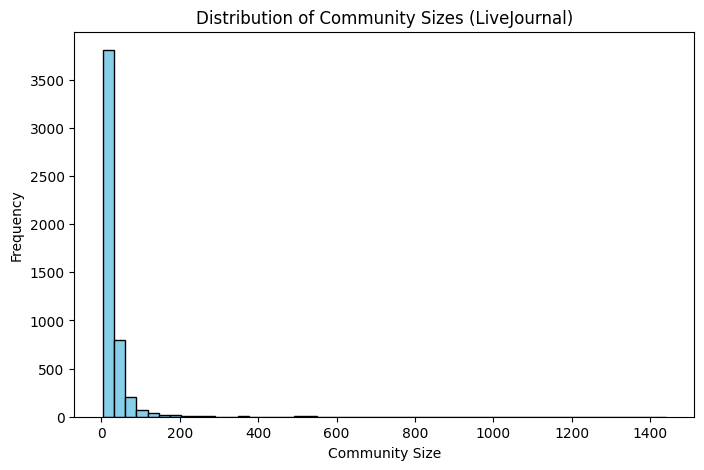

In [7]:
# Visualization: Simple histogram of community sizes

import matplotlib.pyplot as plt

if os.path.exists(file_path):
    plt.figure(figsize=(8, 5))
    plt.hist(community_sizes, bins=50, color="skyblue", edgecolor="black")
    plt.title("Distribution of Community Sizes (LiveJournal)")
    plt.xlabel("Community Size")
    plt.ylabel("Frequency")
    plt.show()

Text(0.5, 1.0, 'Community Size Distribution')

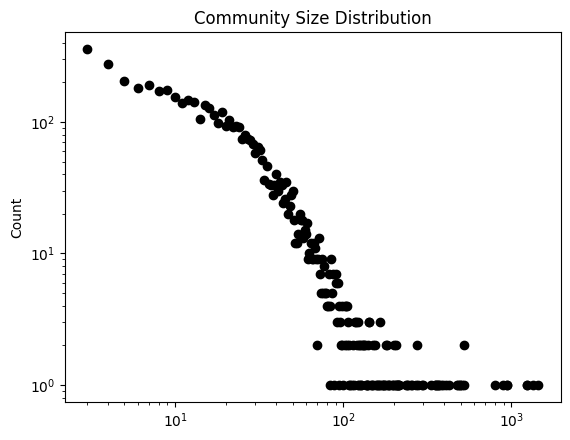

In [8]:
import numpy as np


def log_log_plot(data, normalize=False, ax=None):
    if ax is None:
        ax = plt.gca()
    counts = np.bincount(data)
    x = np.nonzero(counts)[0]
    y = counts[x]
    if normalize:
        y = y / len(data)
    ax.loglog(x, y, "ok", linestyle="None")
    if normalize:
        ax.set_ylabel("Fraction")
    else:
        ax.set_ylabel("Count")
    ax.set_title("Log-Log Degree Distribution")
    return ax


ax = log_log_plot(community_sizes)
ax.set_title("Community Size Distribution")

**e. Explanation**  
Communities in a network significantly influence the flow of information and can drive how quickly ideas, trends, or behaviors spread. A closely-knit group (high cohesiveness) can rapidly share knowledge internally. This makes identifying and understanding these communities crucial for areas like marketing, public health interventions, or content recommendations.

**f. Community Significance Metrics**  
- **Size**: The number of nodes in a community can determine how impactful it might be within the larger network.  
- **Density**: Measures how many edges exist among members relative to the maximum possible number of edges.  
- **Internal vs. External Links**: A community with significantly more internal edges than external edges is generally considered cohesive.





**g. Practical Activities/Codes (using LiveJournal dataset)**

1. **Loading and Parsing**: Learners can write or modify the code above to load the file and explore community statistics.  
2. **Generating a Bar Chart or Histogram**: As shown, use plotting libraries to visualize how community sizes are distributed.  

**h. Challenges in Defining Communities**  
- **Overlapping vs. Disjoint**: Users in real social networks may belong to multiple groups or communities simultaneously.  
- **Definition Variance**: The results can differ dramatically depending on whether you define communities by internal density, modularity, or other criteria.



### **Quiz**

1. **Short questions testing understanding of community definitions and importance:**
   - What is a “community” in the context of network analysis?  
   - Why is community detection vital for complex networks?  
   - Give one real-world example where identifying communities might be beneficial.

### **Activities to Practice**

1. **Write a Short Paragraph**  
   - Explain why community detection matters for social platforms. Discuss how it could influence new features or policies.

2. **Explore the Dataset**  
   - Identify the largest and smallest communities from the dataset.  
   - Share your observations on the distribution of community sizes and why this might matter in real-world applications.


## 6.2 Algorithms: Modularity Optimization, Spectral Clustering, Louvain Method

**Overview**

**a. Objective**  
- Introduce popular algorithms for community detection  
- Compare their theoretical foundations and practical uses  

**b. Introduction**  
- High-level overview of modularity-based methods and spectral methods  
- Brief mention of hierarchical approaches like Louvain  

**c. Modularity Optimization Concepts**  
- Explanation of modularity and why maximizing it helps identify communities  
- Trade-offs and known limitations of modularity  

**d. Examples/Codes (using LiveJournal dataset)**  
- Demonstrating modularity-based community detection on a subset of the data  
- Visualization of detected communities and modularity score  

**e. Explanation**  
- Differences between spectral clustering and modularity approaches  
- How Louvain method iteratively refines community partitions  

**f. Spectral Clustering and Graph Laplacian**  
- Importance of eigenvectors in clustering  
- Steps for applying spectral clustering to real-world networks  

**g. Practical Activities/Codes (using LiveJournal dataset)**  
- Running a simple spectral clustering library function on the dataset  
- Visual comparison of results from modularity optimization and spectral clustering  

**h. Louvain Method Insights**  
- Implementation details and typical runtime advantages  
- Suitability for large-scale datasets, such as LiveJournal  


### **b. Introduction: Modularity and Spectral Methods**

Community detection algorithms come in many varieties, but two major approaches are:

- **Modularity-Based Methods**: These revolve around the concept of modularity, a measure of how densely connected the nodes are within communities compared to random chance.  
- **Spectral Methods**: These rely on the spectral properties of matrices derived from the network graph (such as the Laplacian).  

A **hierarchical** method like **Louvain** builds communities from small clusters up to larger clusters, refining partitions iteratively.




### **c. Modularity Optimization Concepts**

1. **Modularity**:  
   Modularity \( Q \) measures the difference between the actual fraction of edges within communities and the fraction of edges we would expect in a randomized network with the same degree sequence. Higher \( Q \) suggests better-defined communities.

2. **Trade-offs / Limitations**:  
   - The **resolution limit** problem: Modularity might merge smaller communities into larger ones, losing fine-grained details.  
   - Computational cost on very large networks can be high, though optimizations exist.



**Modularity Equation**

$
Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)
$

- \( A_{ij} \): adjacency matrix (1 if edge exists between \( i \) and \( j \), else 0)  
- \( k_i, k_j \): degrees of nodes \( i \) and \( j \)  
- \( m \): total number of edges in the graph  
- \( c_i, c_j \): communities of nodes \( i \) and \( j \)  
- \( \delta(c_i, c_j) \): 1 if nodes \( i \) and \( j \) are in the same community, 0 otherwise



**Pseudocode for Modularity Computation**

```plaintext
Input: Graph G with edges, node degrees k, total edges m
       Communities C = [set of node indices]
Initialize Q = 0
For each community c in C:
    For each pair of nodes i, j in community c:
        A_ij = 1 if edge (i, j) in G, else 0
        Q += A_ij - (k[i] * k[j]) / (2 * m)
Q = Q / (2 * m)
Return Q
```


How do we assign communities?

### Pseudocode for Greedy Modularity Community Detection

```plaintext
Input: Graph G
1. Initialize each node in its own community.
2. Compute initial modularity Q.
3. Repeat:
    a. For every pair of communities (C_i, C_j):
        i. Calculate the change in modularity ΔQ if C_i and C_j are merged.
    b. Find the pair (C_i, C_j) with the highest positive ΔQ.
    c. If ΔQ > 0:
        - Merge C_i and C_j into a new community.
        - Update modularity Q.
    d. Else:
        - Stop (no further improvement possible).
4. Return final community assignment.
```

### **d. Examples/Codes (using Colledge dataset)**

Below, we demonstrate how to implement or pseudo-implement a modularity-based method on the undirected version of the colledge mail set


In [10]:
import networkx as nx

import utils

file_path_college = utils.download_and_extract_data(
    zip_url="https://snap.stanford.edu/data/CollegeMsg.txt.gz",
    zip_filename=None,  # detect from url
    filetype="csv.gz",
)
edge_list = []
with open(file_path_college, "r") as f:
    for line in f:
        # The file format is typically: u v t
        # We'll ignore t for a static representation.
        parts = line.strip().split()
        if len(parts) == 3:
            u, v, _ = parts
            edge_list.append((int(u), int(v)))

# Create an UN-directed graph from the edges
G_college = nx.Graph()
G_college.add_edges_from(edge_list)
# Only keep the giant component for demonstration purposes
G_cc = max(nx.connected_components(G_college), key=len)
G_college = G_college.subgraph(G_cc).copy()

num_nodes_college = G_college.number_of_nodes()
num_edges_college = G_college.number_of_edges()
print("CollegeMsg Graph:")
print(f"Number of Nodes: {num_nodes_college:6,}")
print(f"Number of Edges: {num_edges_college:6,}")

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.
CollegeMsg Graph:
Number of Nodes:  1,893
Number of Edges: 13,835


In [11]:
pos = nx.spring_layout(
    G_college,
    k=0.1,  # smaller k = more compact layout
    iterations=200,
    scale=10,  # restricts max distance between nodes
    center=(0, 0),  # anchor layout center
    seed=42,  # ensures reproducibility
)

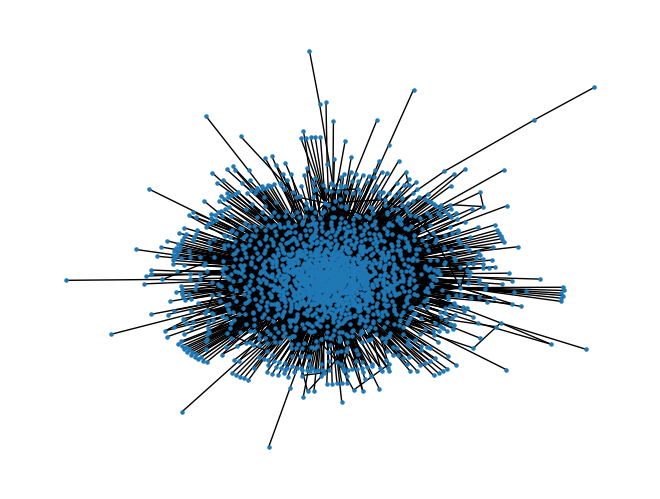

In [12]:
nx.draw(G_college, pos, width=1, node_size=5)

In [13]:
import networkx.algorithms.community as community_algos
dir(community_algos)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'asyn_fluid',
 'asyn_fluidc',
 'asyn_lpa_communities',
 'centrality',
 'community_utils',
 'divisive',
 'edge_betweenness_partition',
 'edge_current_flow_betweenness_partition',
 'fast_label_propagation_communities',
 'girvan_newman',
 'greedy_modularity_communities',
 'is_partition',
 'k_clique_communities',
 'kclique',
 'kernighan_lin',
 'kernighan_lin_bisection',
 'label_propagation',
 'label_propagation_communities',
 'louvain',
 'louvain_communities',
 'louvain_partitions',
 'lukes',
 'lukes_partitioning',
 'modularity',
 'modularity_max',
 'naive_greedy_modularity_communities',
 'partition_quality',
 'quality']

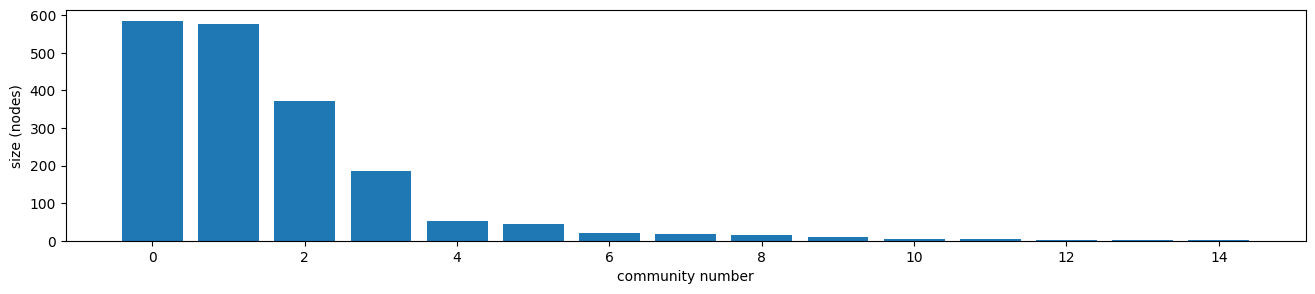

In [24]:
from networkx.algorithms.community import greedy_modularity_communities

# Detect communities
communities_mod = list(greedy_modularity_communities(G_college, resolution=1.0))
# Sort communities by size (descending)
communities_mod.sort(key=len, reverse=True)
community_sizes = [len(c) for c in communities_mod]
fig, ax = plt.subplots(figsize=(16, 3))
ax.bar(range(len(community_sizes)), community_sizes)
ax.set_xlabel("community number")
ax.set_ylabel("size (nodes)")
plt.show()

In [38]:
communities

[['1852932', '1996272', '3314431'],
 ['1173600', '4016759', '4016760'],
 ['2564455', '2932019', '3475754'],
 ['3814589', '3814590', '3814591'],
 ['3274679', '3507601', '3507602'],
 ['3381929', '3858424', '3858425'],
 ['2513049', '3906048', '3906049'],
 ['1596228', '1596625', '1596626'],
 ['829396', '829399', '1443169'],
 ['1533170', '2821108', '2821109'],
 ['645397', '2231247', '2231862'],
 ['2567554', '3380129', '3380130'],
 ['3380129', '3380130', '3380131'],
 ['2062336', '3492179', '3492180'],
 ['355621', '355622', '4029205'],
 ['3486536', '3486537', '3486543'],
 ['879144', '879193', '879194'],
 ['3129270', '3129281', '3129282'],
 ['2697374', '3450204', '3450205'],
 ['3366444', '3366445', '3366450'],
 ['1104965', '1104966', '1104967'],
 ['451314', '2146784', '2146785'],
 ['2177678', '3114772', '3386383'],
 ['1272061', '3391874', '3391875'],
 ['462678', '3437236', '3437237'],
 ['1621694', '2556516', '2556517'],
 ['3922161', '3922162', '3922164'],
 ['2270612', '3972451', '3972452'],
 [

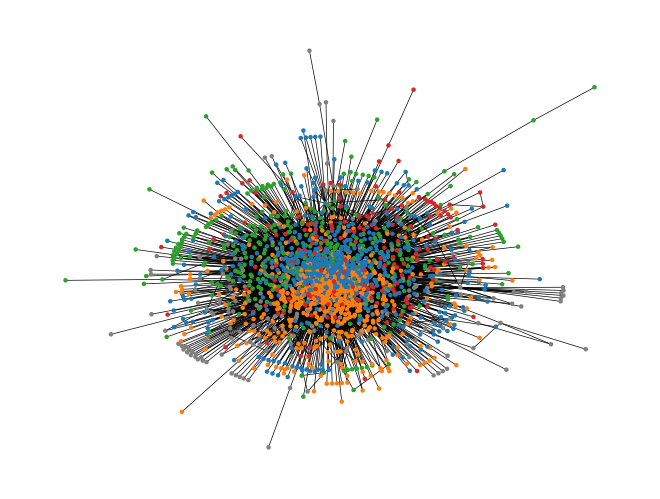

In [25]:
# Create a mapping from node to color
color_map = {}
for c, community in enumerate(communities_mod):
    color = f"C{c}" if c < 4 else "gray"
    for node in community:
        color_map[node] = color

# Get node colors for drawing
node_colors = [color_map[node] for node in G_college.nodes()]

# Draw
nx.draw(G_college, pos, node_color=node_colors, width=0.5, node_size=5)
plt.show()

### **e. Explanation**

- **Spectral Clustering vs. Modularity**:  
  Modularity optimization typically tries to group nodes to maximize \( Q \). In **spectral clustering**, we use eigenvectors of the graph Laplacian to identify natural cuts in the graph.  

- **Louvain Method**:  
  This is a popular hierarchical approach that uses **Modularity**, which starts with small clusters and merges them iteratively to increase modularity. Each pass refines the community assignments until no further improvement is possible.

  Louvain Algorithm:
- Phase 1: Nodes are moved between communities to locally maximize modularity.
- Phase 2: Communities are collapsed into super-nodes to build a new graph.
- Repeat until modularity gain stops.




### g. Practical Activities/Codes 

**Activity 1**: 

Try to accomplish Louvain clustering on `G_colledge`. 

In [30]:
community_algos.louvain_communities

<function networkx.algorithms.community.louvain.louvain_communities(G, weight='weight', resolution=1, threshold=1e-07, max_level=None, seed=None, *, backend=None, **backend_kwargs)>

In [72]:
import networkx as nx

try:
    import community as community_louvain  # python-louvain package
except ImportError:
    !pip install python-louvain
    import community as community_louvain  # python-louvain package

partition = community_louvain.best_partition(
    G_college, resolution=1,  # higher number -> smaller communities
)
...

Ellipsis

**What is `partition` in Louvain Clustering?**

The variable `partition` is a dictionary returned by `community_louvain.best_partition(G_college)`.

```python
{
    node_1: community_id_1,
    node_2: community_id_2,
    ...
}
```
Keys: Nodes in the graph G_college.
 - Values: Integer labels representing the community each node belongs to.
 - Nodes with the same community ID are considered part of the same cluster.


In [73]:
# partition

<BarContainer object of 12 artists>

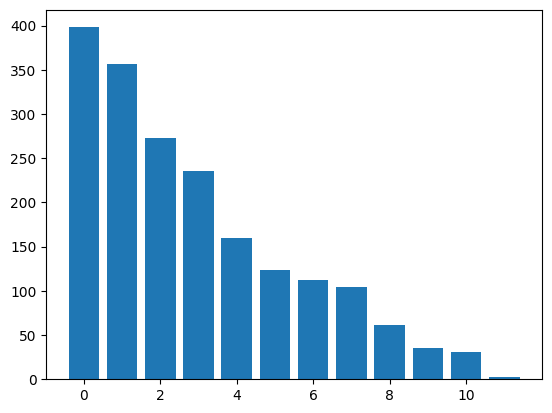

In [74]:
n_communities = max(partition.values()) + 1
communities_louvian = []
for i in range(n_communities):
    communities_louvian.append(
        [k for k,v in partition.items() if v == i]
    )
communities_louvian.sort(key=lambda c: len(c), reverse=True)
community_sizes_louvian = [len(c) for c in communities_louvian]
plt.bar(range(n_communities), community_sizes_louvian)


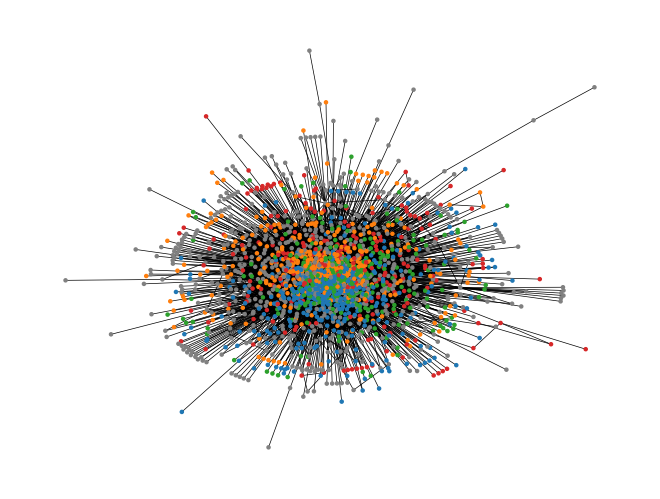

In [75]:
color_map = {}
for c, community in enumerate(communities_louvian):
    color = f"C{c}" if c < 4 else "gray"
    for node in community:
        color_map[node] = color

# Get node colors for drawing
node_colors = [color_map[node] for node in G_college.nodes()]

# Draw
nx.draw(G_college, pos, node_color=node_colors, width=0.5, node_size=5)
plt.show()



### **f. Spectral Clustering and Graph Laplacian**

1. **Graph Laplacian**: The Laplacian \( L = D - A \) is the difference between the degree matrix \( D \) and adjacency matrix \( A \).  
2. **Eigenvectors**: The eigenvectors of \( L \) (often focusing on the smallest eigenvalues) can reveal natural splits in the graph.  
3. **Implementation Steps**:  
   - Construct the adjacency or Laplacian matrix.  
   - Compute a fixed number of eigenvectors (k).  
   - Cluster the data in that new eigen-space, often with K-means.


In [80]:
try:
    from sklearn.cluster import SpectralClustering
except ImportError:
    !pip install scikit-learn
    from sklearn.cluster import SpectralClustering

# Adjacency matrix
A = nx.to_numpy_array(G_college)

# Apply spectral clustering
sc = SpectralClustering(n_clusters=10, affinity="precomputed", assign_labels="kmeans")
labels = sc.fit_predict(A)
labels

/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


array([0, 0, 0, ..., 3, 0, 0], shape=(1893,), dtype=int32)

In [81]:
labels

array([0, 0, 0, ..., 3, 0, 0], shape=(1893,), dtype=int32)


**Activity 2**: *Modularity vs. Spectral Results*

After performing both techniques (modularity-based and spectral-based), visualize or compare how many communities you get and their approximate sizes.  



In [82]:
...

Ellipsis

### **h. Louvain Method Insights**

1. **Implementation Details**:  
   Louvain typically requires repetitive passes over the nodes to find moves that locally increase modularity. It aggregates communities to form a hierarchy and repeats the optimization.

2. **Runtime Advantages**:  
   Scales better than many other methods on large graphs, such as our LiveJournal data.

3. **Suitability**:  
   Often the go-to approach for big networks due to its balance of performance and speed.


### **i. Spectral Methods Insights**

1. **Mathematical Foundation**:  
   Spectral clustering leverages the eigenvalues and eigenvectors of graph Laplacians to embed nodes into a lower-dimensional space. Community detection is then performed in this spectral space, typically using k-means.

2. **Advantages**:  
   - Captures global graph structure.
   - Works well for graphs with well-separated clusters.
   - Can reveal fine-grained structures missed by modularity-based methods.

3. **Limitations**:  
   - Requires the number of clusters \( k \) to be known or estimated in advance.
   - Computationally intensive for large graphs due to eigen-decomposition.
   - Less scalable than Louvain for massive networks.

4. **Use Cases**:  
   Suitable for medium-sized networks or when high-quality embeddings are needed for downstream tasks like visualization or refinement of community structure.



### **Quiz**

Multiple-choice questions on algorithmic differences (modularity vs. spectral vs. Louvain).  
1. Which approach is known for the resolution limit issue (i.e., the tendency to merge small but meaningful communities into larger ones)?  
2. Which approach relies on eigenvectors of the graph Laplacian?  
3. Which method iteratively merges communities to maximize modularity?




### **Activities to Practice**

1. **Experiment with Two Algorithms**  
   - Pick any two from (Greedy Modularity, Spectral, Louvain).  
   - Run them on the college data.  
   - Document the differences in the communities detected (e.g., size, count).  

2. **Observations**  
   - Discuss any discrepancies or similarities in the identified communities.  
   - Reflect on potential reasons (e.g., different objectives, resolution limit).


## 6.3 Applications in Detecting Groups in Social Networks and Protein-Protein Interactions

**Overview**

**a. Objective**  
- Show how community detection algorithms are applied beyond social networks  
- Emphasize cross-domain importance of clustering in graphs  

**b. Introduction**  
- Common use cases: friend recommendation, marketing, biology research  
- Value of communities in specialized domains (e.g., functional modules in protein networks)  

**c. Social Network Group Detection**  
- Identifying influential groups for targeted advertising  
- Tracking community evolution over time  

**d. Examples/Codes (using LiveJournal dataset)**  
- Highlight real groups in the LiveJournal data (e.g., hobby groups, fan clubs)  
- Visualization of a specific community and its members  

**e. Explanation**  
- How insights from social network communities translate to business or policy decisions  
- Key metrics (centrality, density) that reveal community roles  

**f. Protein-Protein Interaction (PPI) Networks**  
- Biological analogy: communities as functional modules  
- Relevance of dense subgraphs in understanding protein complexes  

**g. Practical Activities/Codes (using LiveJournal dataset)**  
- Draw parallels between social network clusters and hypothetical PPI data  
- Modify code to treat user communities as “functional modules” in a mock scenario  

**h. Cross-Domain Challenges**  
- Different data scales and noise levels in social vs. biological networks  
- Importance of domain knowledge when interpreting communities  
### **b. Introduction: Applications Across Domains**

Community detection goes beyond social networks. In online platforms, detecting groups can help tailor recommendations and identify influential communities. In biological networks, finding densely connected subgraphs can reveal underlying functionalities, like protein complexes or gene regulatory modules.

---

### **c. Social Network Group Detection**

1. **Influential Groups for Targeted Advertising**  
   By identifying groups with high internal connectivity, marketers can more effectively focus on specific communities. This can optimize advertising campaigns or outreach.

2. **Community Evolution**  
   Communities are not static; monitoring how they grow, shrink, or split can provide insights into user behavior, brand loyalty, or social movements.

---

### **d. Examples/Codes (using College dataset)**

Below is an example of how we might look for a specific community in the College dataset and attempt to visualize it.


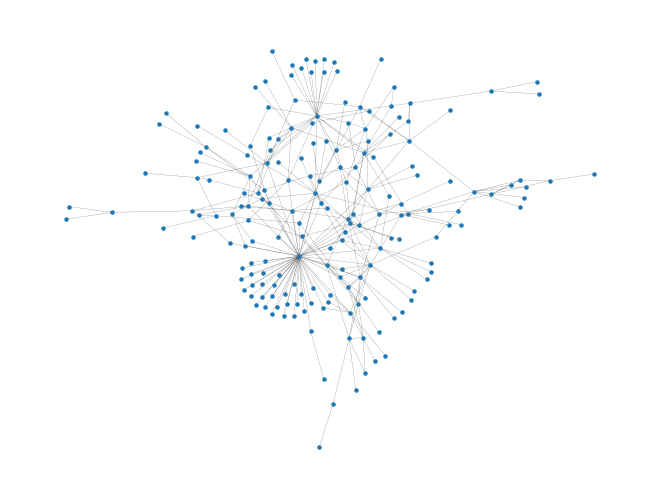

In [84]:
ix_community = 3
community_nodes = communities_mod[ix_community]
G_comm = G_college.subgraph(community_nodes).copy()
nx.draw(G_comm, node_size=5, width=0.10)

It is sometimes useful to build a graph that **represents interactions between communities instead of individual nodes**. In this **meta-graph** (or community-level graph), each node corresponds to an entire community, and edges represent the aggregate connectivity between communities.

This abstraction simplifies the analysis of large networks by:
- Highlighting how different communities interact.
- Reducing graph size for visualization or modeling.
- Allowing investigation of mesoscale structure (e.g., bridges, bottlenecks between groups).

Edge weights can be defined as the number of edges between nodes in different communities, giving insight into the strength of inter-community connections.

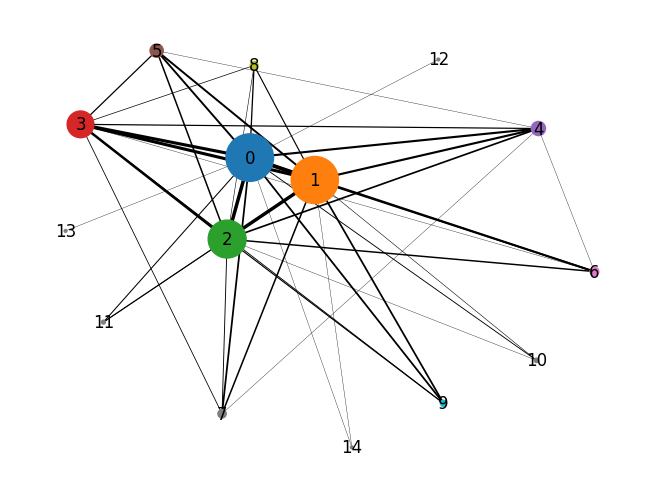

In [85]:
from collections import defaultdict

# Map node to community ID
node_to_comm = {}
for comm_id, comm_nodes in enumerate(communities_mod):
    for node in comm_nodes:
        node_to_comm[node] = comm_id

# Initialize inter-community graph
G_meta = nx.Graph()

# Count edges between communities
edge_weights = defaultdict(float)
for u, v in G_college.edges():
    cu = node_to_comm[u]
    cv = node_to_comm[v]
    if cu == cv:
        continue
    edge_weights[(min(cu, cv), max(cu, cv))] += 1.0

# Add nodes
for comm_id in range(len(communities_mod)):
    G_meta.add_node(comm_id)

# Add edges with weights
for (cu, cv), w in edge_weights.items():
    G_meta.add_edge(cu, cv, weight=w)

# Color mapping
colors = [f"C{c}" if c < 10 else "gray" for c in G_meta.nodes()]
widths = [np.log2(1 + G_meta[u][v]["weight"]) / 4 for u, v in G_meta.edges()]

node_sizes = [len(communities_mod[c]) * 2 for c in G_meta.nodes()]

# Draw with adjusted layout and size
pos_meta = nx.spring_layout(
    G_meta, seed=42, k=12.5  # strong repulsion forces to prevent node overlap
)

nx.draw(
    G_meta,
    pos_meta,
    with_labels=True,
    node_color=colors,
    node_size=node_sizes,
    width=widths,
)

### **e. Explanation**

- **Social Network Communities & Business/Policy Decisions**  
  Identifying a thriving fan club or interest group can guide how a platform might suggest new groups or content. Networks with high centrality nodes can be targeted for disseminating public health campaigns or political messages.

- **Role of Centrality and Density**  
  - **Centrality** (e.g., degree, betweenness) indicates how critical certain nodes are within the community.  
  - **Density** relates to how interconnected the group is, impacting information flow and community stability.



### More examples

**Protein-Protein-Interactions (PPI)**

In biological settings, a group of proteins that frequently interact with each other may represent a functional module. Identifying such modules helps in discovering protein complexes, understanding pathways, and hypothesizing gene functions. PPI networks often resemble social networks in that “communities” or “clusters” can indicate functional groupings.


**Drug Interactions (FAERS)**

The FDA Adverse Event Reporting System (FAERS) collects data on adverse drug reactions, enabling the construction of drug interaction networks. In these networks, nodes represent drugs, and edges indicate co-reported adverse events. Community detection within such networks can reveal clusters of drugs associated with similar side effect profiles or therapeutic classes. This approach aids in identifying potential drug-drug interactions and understanding the underlying mechanisms of adverse reactions.

# **Answers to Quizzes**

---

## **Answers for Unit 6.1**

1. **What is a “community” in the context of network analysis?**  
   A community is a group of nodes that are more densely connected to each other than to the rest of the network.

2. **Why is community detection vital for complex networks?**  
   It reveals underlying structures or clusters that can influence information flow, user behavior, or functional roles within the network.

3. **Real-world example where identifying communities might be beneficial**  
   In social media, finding tightly knit fan groups helps target recommendations or ads more effectively.

---

## **Answers for Unit 6.2**

1. **Which approach is known for the resolution limit issue?**  
   Modularity optimization can struggle with small communities because of the resolution limit.

2. **Which approach relies on eigenvectors of the graph Laplacian?**  
   Spectral clustering uses the eigenvectors of the Laplacian for partitioning.

3. **Which method iteratively merges communities to maximize modularity?**  
   The Louvain method refines communities in passes, merging them to improve modularity.

---

## **Answers for Unit 6.3**

1. **How does a community in a social network compare to a functional module in a PPI network?**  
   Both represent densely connected subsets of the larger network. In social settings, this often means shared interests or friendships; in biology, these are proteins that physically or functionally interact.

2. **Two potential pitfalls of directly applying social network methods to PPI data**  
   - Biological data may be noisier or incomplete, so social methods might overfit.  
   - PPI networks can have different connectivity dynamics, requiring domain-specific interpretations.

---

## **Answers for Unit 6.4**

1. **True/False: Louvain is generally less scalable than spectral clustering for very large networks**  
   False. Louvain tends to be more scalable on large networks due to its iterative aggregation approach.

2. **Why might we see drastically different community structures using different algorithms on the same dataset?**  
   Each algorithm optimizes or detects communities based on different criteria (e.g., modularity vs. eigenvalue gaps), leading to variations in the number and size of communities found.

---

## **Answers for Unit 6.5**

1. **Which metric compares discovered partitions with ground truth, adjusting for chance?**  
   Adjusted Rand Index (ARI) accounts for chance agreements in partitioning.

2. **One reason overlapping communities are more realistic in real-world networks**  
   Individuals (or nodes) often belong to multiple groups simultaneously, so strict partitioning may not capture the true complexity of relationships.
